## Component 3 Coding :  Understanding AI assignment

###  Applying Convolutional Neural Network on the MNIST dataset


### About the Dataset


##### Source: http://yann.lecun.com/exdb/mnist/

  
             

###### Dataset name: Modified National Institute of Standards and Technology database dataset.


###### DESCRIPTION

 - Number of classes: 10
 - Total number of images: 70000 28x28 colour images 
 - Number of images per class: 7000 images per class
 - Number of training images: 60000
 - Number of test images: 10000
 
 


## The basic steps for Image classification with a 2D Convolutional Neural Network

#### 1. Import necessary libraries: tensorflow, SGD, numpy, classification_report etc.

#### 2. Load the dataset: The dataset should contain labeled samples for both training and testing.

#### 3. Preprocess the data: This step involves transformation of the image dataset, for example, augmentation using shift, rotation, flip methods etc.

#### 4. Build the model: In Keras, a Sequential model is a linear stack of layers, and you can add layers to it using the add() method. The first layer in the model should specify the input shape.

#### 5. Compile the model: This step involves specifying the loss function, the optimizer, and any metrics that you want to track during training.

#### 6. Train the model: Use the fit() method to train the model on the training data. You can also specify the validation data here.

#### 7. Evaluate the model: Use the evaluate() method to evaluate the model on the test data. This will give you the accuracy and other metrics that you specified earlier.

#### 8. Make predictions: Use the predict() method to make predictions on new data.

#### 9. Visualise the results: Use tools like Confusion matrix, classification report, Matplotlib to visualize the results, for example, plot the training and validation loss, plot the confusion matrix, etc.

### Step 1: import required libraries

In [1]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from keras.utils import np_utils


### Step 2: Loading the dataset

#### Load the MNIST dataset

###### The x_train and y_train variables contain the 60,000 training images and their corresponding labels, 
###### while x_test and y_test contain the 10,000 test images and their labels.


###### mnist.load_data() function splits the  MNIST dataset into 60,000 training images and 10,000 test images. 
###### the load_data() function will return two tuples  one containing the training data and  the other, test data

In [2]:
# The class names for the CIFAR-10 dataset are predefined and can be found in the official documentation
#class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
class_names = range(9)

In [3]:
# Load the  MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

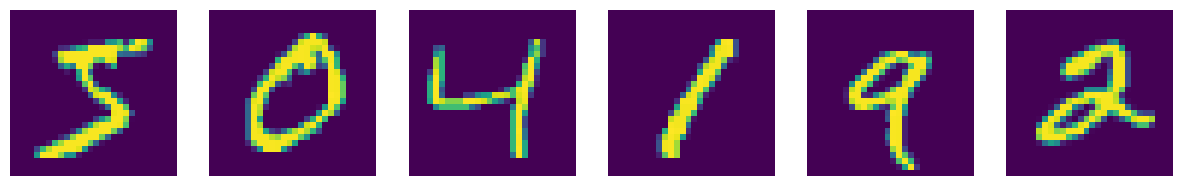

In [4]:
# Plot the first 6 images from the training set
fig, axs = plt.subplots(1, 6, figsize=(15, 3))
for i in range(6):
    axs[i].imshow(x_train[i])
    axs[i].axis('off')
plt.show()



In [5]:
x_train[1].shape   #  This shows the shape of one of the train images (length, width, channel)

(28, 28)

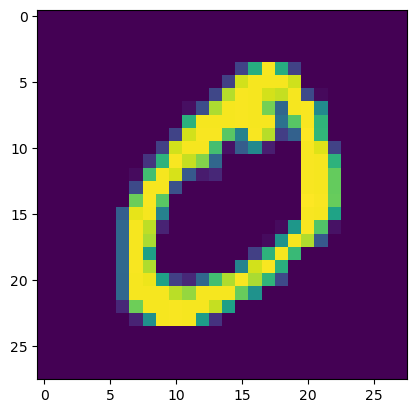

In [6]:

plt.imshow(x_train[1])

In [7]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
y_train.shape

(60000,)

In [10]:
#reshape the input to have a single color channel.

In [11]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [12]:
#converting the integer value to float before Normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [13]:
#one hot encode target values
#count_of_classes = 10
#Y_train = np_utils.to_categorical(y_train, count_of_classes)
#Y_test = np_utils.to_categorical(y_test, count_of_classes)

### Step 3. Preprocess the data

In [14]:
# Normalize pixel values to range 0-1
# the pixel values in an image typically range from 0 to 255
# 1dividing all pixel values by 255 brings the pixel values to the range between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [15]:
x_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#For preprocessing, the ImageDataGenerator is used. 
#It is used for the generation of batches of augmented image data 
#in real-time during the training process;

In [17]:
# Define data augmentation parameters for training set

train_datagenerator = ImageDataGenerator(
    rotation_range=20,  # Randomly rotate images up to 20 degrees
    width_shift_range=0.1,  # Randomly shift images horizontally up to 10% of the width
    height_shift_range=0.1,  # Randomly shift images vertically up to 10% of the height
    horizontal_flip=True,  # Randomly flip images horizontally
    vertical_flip=False,  # Don't randomly flip images vertically
    shear_range=0.10, # crops part of the image
    zoom_range=0.10 # #zooms the image by 10%
)

In [18]:
# Fit the transformation to the training dataset
train_datagenerator.fit(x_train)

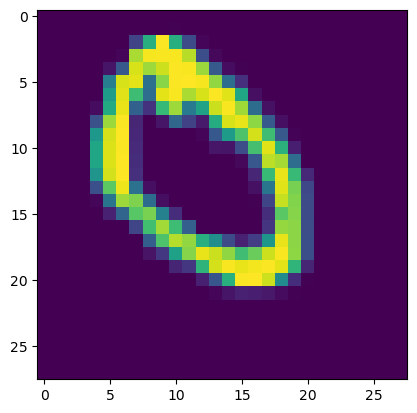

In [19]:
# showing sample of a transformation
plt.imshow(train_datagenerator.random_transform(x_train[1]))

### Step 4. Build the model (Constructor stage)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,ZeroPadding2D
from tensorflow.keras.optimizers import SGD,Adam
from keras.optimizers import RMSprop

In [21]:
# Define the CNN architecture

# Conv2D(filters=32,kernel_size=(3, 3) means use 32 filters (also called kernels) of size 3x3

# input_shape=(28, 28, 1) means the input data is a 3D tensor with dimensions 28x28x1.(height x width x number_of_channels)
    # The first dimension of the tensor (28) is the height of the image.
    #The second dimension of the tensor (28) is the width of the image.
    #The third dimension of the tensor (1) is the number of channels in the image (Black, White colors of the image).

# The MaxPooling2D(2, 2) performs a pooling operation where the (2,2) argument indicates the size of the pooling window.
    # It reduces the spatial size of the feature maps and prevent overfitting
    # The output of the convolutional and pooling layers is a 3D tensor;

# The Flatten() layer takes 3D tensor (height, width, channels) and reshapes it into a 1D array;
    # The output of the convolutional and pooling layers is a 3D tensor;
    # 1D array is required by the fully connected (dense) layers; 
    # Flatten() later enables the transition from the convolutional and pooling layers to the fully connected layers;

mnist_model = Sequential()
mnist_model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
mnist_model.add(MaxPooling2D(pool_size=(2,2)))
mnist_model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
mnist_model.add(MaxPooling2D(pool_size=(2,2)))
mnist_model.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
mnist_model.add(MaxPooling2D(pool_size=(2,2)))
mnist_model.add(Flatten())
mnist_model.add(Dense(128,activation = 'relu'))
mnist_model.add(Dropout(0.5))
mnist_model.add(Dense(10,activation = 'softmax'))

In [22]:
# print the summary of the model constructed
mnist_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

### Step 5: Compile the model (Compilation stage)

In [23]:
# Compile the model with categorical cross-entropy loss and SGD optimizer
#categorical_crossentropy - loss function during model training
#accuracy - Evaluation measure
#SGD - Stochastic Gradient Descent

# learning_rate=0.001 specifies the step size of the updates to the weights during training. 
# momentum=0.9 is a parameter that helps the optimizer to accelerate in the direction of the gradient and dampen oscillations.
# Higher values of momentum allow the optimizer to move more smoothly towards the global minimum 
  # and reduce the chance of getting stuck in local minima.

mnist_model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

### Step 6: Training and evaluation of the model (Training stage)

In [24]:
# Train the model with 20 epochs and batch size of 32
# to_categorical () converts integer class labels into one-hot encoded vectors;
# also used to convert predicted scores back into class labels for evaluation in classification problems.

# batch_size=32: the training dataset is put into mini-batches of size 32.

#epochs=25: The model will be trained for 20 epochs; 
#This means the dataset will be passed through the model 20 times for training.

history=mnist_model.fit(train_datagenerator.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),
         epochs=10, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/10
1875/1875 [==============================] - 115s 40ms/step - loss: 1.4923 - accuracy: 0.4847 - val_loss: 0.4398 - val_accuracy: 0.8729
Epoch 2/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.7039 - accuracy: 0.7638 - val_loss: 0.2572 - val_accuracy: 0.9202
Epoch 3/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.5273 - accuracy: 0.8296 - val_loss: 0.1620 - val_accuracy: 0.9499
Epoch 4/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.4274 - accuracy: 0.8638 - val_loss: 0.1507 - val_accuracy: 0.9483
Epoch 5/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.3650 - accuracy: 0.8867 - val_loss: 0.1034 - val_accuracy: 0.9646
Epoch 6/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.3214 - accuracy: 0.9007 - val_loss: 0.1089 - val_accuracy: 0.9650
Epoch 7/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.2925 - accuracy: 0.9092 - val_loss: 0.0838 

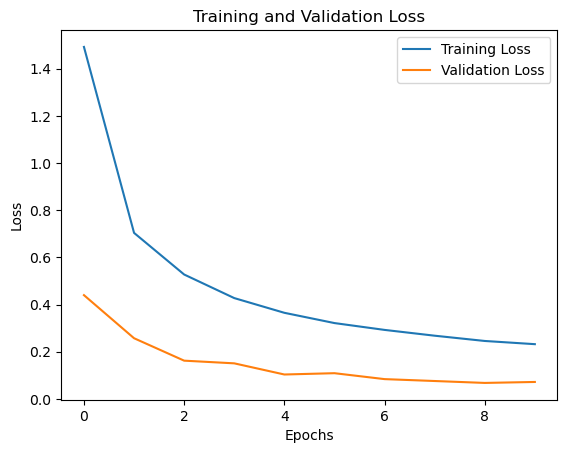

In [25]:
## checking for overfitting

# Plot training loss against validation loss

#Plots the training loss as a line with label "Training Loss".
plt.plot(history.history['loss'], label='Training Loss')

#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history.history['val_loss'], label='Validation Loss')

#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss')

#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')

#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')

#Shows the legend of the plot with the labels of the two lines.
plt.legend()

#Shows the plot on the screen.
plt.show()

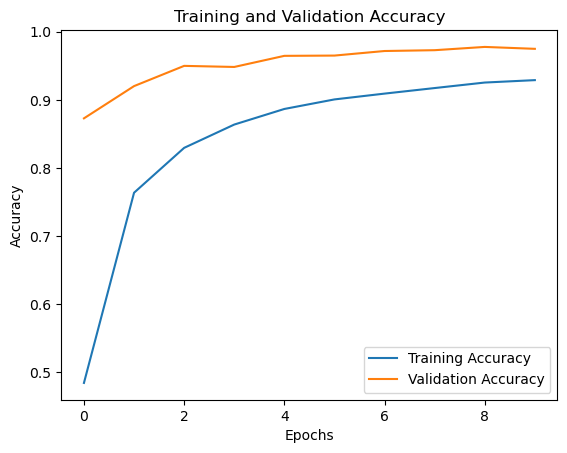

In [26]:
# Plot training and validation accuracy

#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history.history['accuracy'], label='Training Accuracy')

#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy')

#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')

#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')

#Shows the legend of the plot with the labels of the two lines.
plt.legend()

#Shows the plot on the screen.
plt.show()


### Step 7: Test the model (Make predictions)

In [27]:
# Predict the classes of the test set

#np.argmax(model.predict(x_test), axis=-1), 
#this means that the argmax operation will be applied to the output predictions of the model along the last dimension;
#this is the class probabilities for each test instance.
# argmax returns the class with the largest predicted probability.

y_pred = np.argmax(mnist_model.predict(x_test), axis=-1)

313/313 [==============================] - 2s 6ms/step


### Step 8: Visualise the results

In [28]:
from sklearn.metrics import classification_report
mnist_classification_report = classification_report(y_test, y_pred,output_dict=True)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.95      0.95      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.96      0.94      0.95       892
           6       0.97      0.98      0.97       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [29]:
df_report = pd.DataFrame(mnist_classification_report).transpose()
df_report

,precision,recall,f1-score,support
0,0.986802,0.991837,0.989313,980.0000
1,0.994714,0.994714,0.994714,1135.0000
2,0.952242,0.946705,0.949466,1032.0000
3,0.975490,0.985149,0.980296,1010.0000
4,0.993717,0.966395,0.979866,982.0000
5,0.962199,0.941704,0.951841,892.0000
6,0.965944,0.977035,0.971458,958.0000
7,0.973913,0.980545,0.977218,1028.0000
8,0.983539,0.981520,0.982528,974.0000
9,0.958252,0.978196,0.968122,1009.0000


In [30]:
# Print the confusion matrix
#from sklearn.metrics import ConfusionMatrixDisplay


#plt.figure(dpi=200, figsize=(10,15))
#ConfusionMatrixDisplay.from_predictions(y_test,y_pred, display_labels=class_names)
#plt.title('Confusion Matrix')
#plt.show()

# Question(a)

- **a.How did the use of different regularisation methods affect the performance of your CNN model?**
    -  Regularisation helps us improve the generalisation of our model on unseen data. Some regularization methods are:
          - Dropout
          - Early Stopping
          - L1 and L2
          - Data Augmentation
          - Batch Normaliztion

# Regularisation Method( Early Stopping)

In [31]:
mnist_model2 = Sequential()
mnist_model2.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
mnist_model2.add(MaxPooling2D(pool_size=(2,2)))
mnist_model2.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
mnist_model2.add(MaxPooling2D(pool_size=(2,2)))
mnist_model2.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
mnist_model2.add(MaxPooling2D(pool_size=(2,2)))
mnist_model2.add(Flatten())
mnist_model2.add(Dense(128,activation = 'relu'))
mnist_model2.add(Dropout(0.5))
mnist_model2.add(Dense(10,activation = 'softmax'))
#compiling the model
mnist_model2.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
#Training the model

from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss",mode="min", patience=5,restore_best_weights=True,verbose=1)
 
history2=mnist_model2.fit(train_datagenerator.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),
          epochs=25, validation_data=(x_test, keras.utils.to_categorical(y_test)),callbacks=[earlystopping])

Epoch 1/25
1875/1875 [==============================] - 76s 39ms/step - loss: 1.5362 - accuracy: 0.4666 - val_loss: 0.4608 - val_accuracy: 0.8419
Epoch 2/25
1875/1875 [==============================] - 73s 39ms/step - loss: 0.7009 - accuracy: 0.7675 - val_loss: 0.2780 - val_accuracy: 0.9067
Epoch 3/25
1875/1875 [==============================] - 69s 37ms/step - loss: 0.5173 - accuracy: 0.8319 - val_loss: 0.1961 - val_accuracy: 0.9393
Epoch 4/25
1875/1875 [==============================] - 69s 37ms/step - loss: 0.4242 - accuracy: 0.8653 - val_loss: 0.1429 - val_accuracy: 0.9531
Epoch 5/25
1875/1875 [==============================] - 71s 38ms/step - loss: 0.3621 - accuracy: 0.8856 - val_loss: 0.1161 - val_accuracy: 0.9622
Epoch 6/25
1875/1875 [==============================] - 71s 38ms/step - loss: 0.3217 - accuracy: 0.9003 - val_loss: 0.0997 - val_accuracy: 0.9670
Epoch 7/25
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2846 - accuracy: 0.9117 - val_loss: 0.0837 -

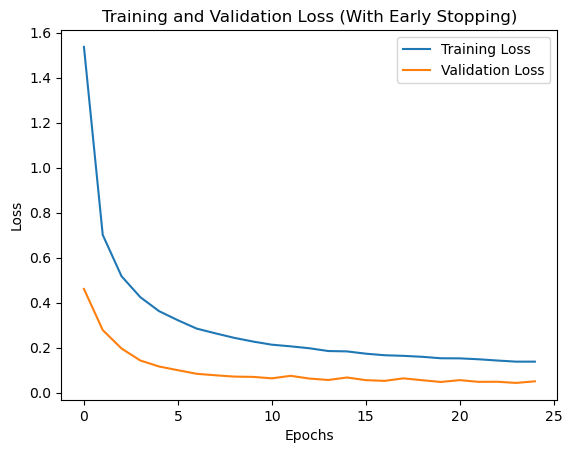

In [33]:
## checking for overfitting

# Plot training loss against validation loss

#Plots the training loss as a line with label "Training Loss".
plt.plot(history2.history['loss'], label='Training Loss')

#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history2.history['val_loss'], label='Validation Loss')

#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss (With Early Stopping)')

#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')

#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')

#Shows the legend of the plot with the labels of the two lines.
plt.legend()

#Shows the plot on the screen.
plt.show()

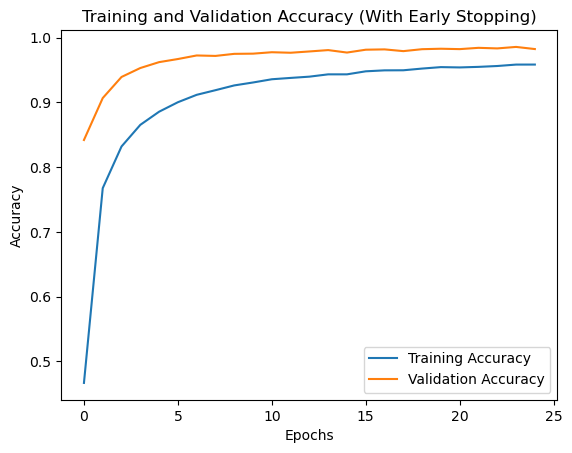

In [34]:
# Plot training and validation accuracy

#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history2.history['accuracy'], label='Training Accuracy')

#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')

#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy (With Early Stopping)')

#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')

#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')

#Shows the legend of the plot with the labels of the two lines.
plt.legend()

#Shows the plot on the screen.
plt.show()

In [35]:
#make predictions
y_pred2 = np.argmax(mnist_model2.predict(x_test), axis=-1)

313/313 [==============================] - 3s 7ms/step


In [36]:
#Visualize the result
from sklearn.metrics import classification_report
mnist_classification_report2 = classification_report(y_test, y_pred2,output_dict=True)

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.95      0.96      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.95      0.98      0.96       892
           6       0.98      0.98      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [37]:
df_report2 = pd.DataFrame(mnist_classification_report2).transpose()
df_report2

,precision,recall,f1-score,support
0,0.993884,0.994898,0.994391,980.0000
1,0.998222,0.989427,0.993805,1135.0000
2,0.975174,0.951550,0.963217,1032.0000
3,0.987192,0.992079,0.989630,1010.0000
4,0.985772,0.987780,0.986775,982.0000
5,0.947084,0.983184,0.964796,892.0000
6,0.975130,0.982255,0.978679,958.0000
7,0.992032,0.968872,0.980315,1028.0000
8,0.993789,0.985626,0.989691,974.0000
9,0.971762,0.989098,0.980354,1009.0000


#### Observation(s)

- The model had it's least validation loss of 0.0460 at the 23rd epoch, hence I will be keeping this epoch value constant
- The training completed up to the 25th epoch with early stopping in-place, hence the model did not overfit up to 
  the 25th epoch 

# Regularisation Method(Batch Normaliztion)

- We would examine the introduction of Batch Normalization into our model because it normalizes the matrix after it has been through a convolution layer. It reduces training time and ensures that the scale of each dimension remains the same.

In [38]:
mnist_model3 = Sequential()
mnist_model3.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
mnist_model3.add(MaxPooling2D(pool_size=(2,2)))
mnist_model3.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
mnist_model3.add(MaxPooling2D(pool_size=(2,2)))
mnist_model3.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
mnist_model3.add(MaxPooling2D(pool_size=(2,2)))
mnist_model3.add(Flatten())
mnist_model3.add(BatchNormalization())
mnist_model3.add(Dense(128,activation = 'relu'))
mnist_model3.add(Dropout(0.5))
mnist_model3.add(Dense(10,activation = 'softmax'))
#compiling the model
mnist_model3.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
#Training and evaluating the model
history3=mnist_model3.fit(train_datagenerator.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),
         epochs=23, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/23
1875/1875 [==============================] - 78s 37ms/step - loss: 0.7696 - accuracy: 0.7450 - val_loss: 0.2164 - val_accuracy: 0.9333
Epoch 2/23
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3805 - accuracy: 0.8799 - val_loss: 0.1068 - val_accuracy: 0.9654
Epoch 3/23
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2971 - accuracy: 0.9073 - val_loss: 0.0878 - val_accuracy: 0.9716
Epoch 4/23
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2468 - accuracy: 0.9239 - val_loss: 0.0941 - val_accuracy: 0.9701
Epoch 5/23
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2236 - accuracy: 0.9336 - val_loss: 0.0770 - val_accuracy: 0.9747
Epoch 6/23
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2020 - accuracy: 0.9385 - val_loss: 0.0635 - val_accuracy: 0.9802
Epoch 7/23
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1927 - accuracy: 0.9402 - val_loss: 0.0879 -

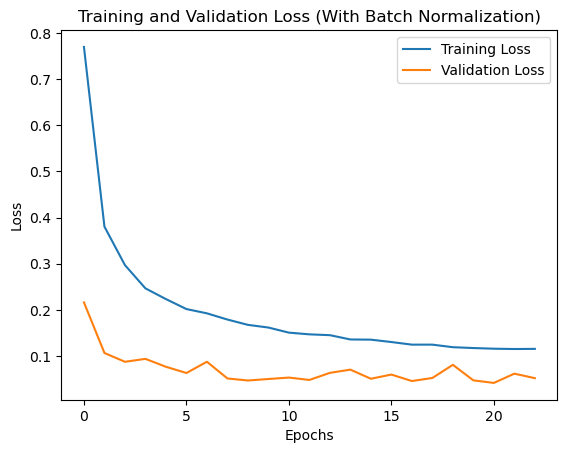

In [40]:
## checking for overfitting

# Plot training loss against validation loss

#Plots the training loss as a line with label "Training Loss".
plt.plot(history3.history['loss'], label='Training Loss')

#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history3.history['val_loss'], label='Validation Loss')

#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss (With Batch Normalization)')

#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')

#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')

#Shows the legend of the plot with the labels of the two lines.
plt.legend()

#Shows the plot on the screen.
plt.show()

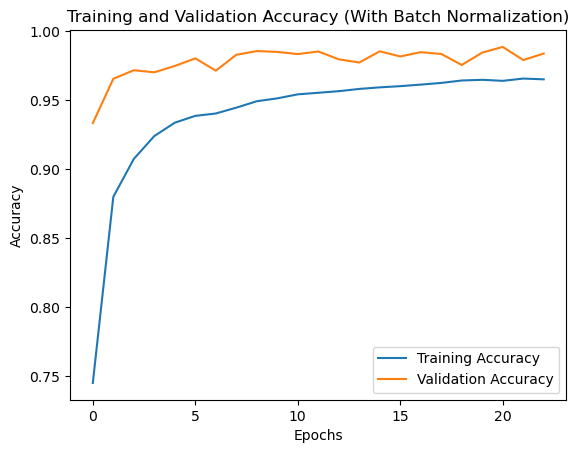

In [41]:
# Plot training and validation accuracy

#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history3.history['accuracy'], label='Training Accuracy')

#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')

#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy (With Batch Normalization)')

#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')

#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')

#Shows the legend of the plot with the labels of the two lines.
plt.legend()

#Shows the plot on the screen.
plt.show()

In [42]:
#make predictions
y_pred3 = np.argmax(mnist_model3.predict(x_test), axis=-1)

313/313 [==============================] - 1s 3ms/step


In [43]:
#Visualize the result
from sklearn.metrics import classification_report
mnist_classification_report3 = classification_report(y_test, y_pred3,output_dict=True)

print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.99      1.00      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.95      0.98      0.97       892
           6       0.99      0.96      0.97       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [44]:
df_report3 = pd.DataFrame(mnist_classification_report3).transpose()
df_report3

,precision,recall,f1-score,support
0,0.996917,0.989796,0.993344,980.0000
1,1.000000,0.982379,0.991111,1135.0000
2,0.956023,0.968992,0.962464,1032.0000
3,0.986288,0.997030,0.991630,1010.0000
4,0.982915,0.995927,0.989378,982.0000
5,0.952226,0.983184,0.967457,892.0000
6,0.993492,0.956159,0.974468,958.0000
7,0.980714,0.989300,0.984988,1028.0000
8,0.994840,0.989733,0.992280,974.0000
9,0.992008,0.984143,0.988060,1009.0000


#### Observation(s)

- The model's accuracy increased by 0.4% while the validation loss reduced by 10.7% with the introduction of Batch Normalization

#### Investigating the performance of the model with different optimizers

- The following parameters will be kept constant : Learning_rate, Batch_size and Epochs

In [45]:
mnist_model4 = Sequential()
mnist_model4.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
mnist_model4.add(MaxPooling2D(pool_size=(2,2)))
mnist_model4.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
mnist_model4.add(MaxPooling2D(pool_size=(2,2)))
mnist_model4.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
mnist_model4.add(MaxPooling2D(pool_size=(2,2)))
mnist_model4.add(Flatten())
mnist_model4.add(BatchNormalization())
mnist_model4.add(Dense(128,activation = 'relu'))
mnist_model4.add(Dropout(0.5))
mnist_model4.add(Dense(10,activation = 'softmax'))
#compiling the model
mnist_model4.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
#Training and evaluating the model
history4=mnist_model4.fit(train_datagenerator.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),
         epochs=23, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/23
1875/1875 [==============================] - 31s 16ms/step - loss: 0.4424 - accuracy: 0.8581 - val_loss: 0.1921 - val_accuracy: 0.9482
Epoch 2/23
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2203 - accuracy: 0.9320 - val_loss: 0.0620 - val_accuracy: 0.9799
Epoch 3/23
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1867 - accuracy: 0.9444 - val_loss: 0.1264 - val_accuracy: 0.9658
Epoch 4/23
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1668 - accuracy: 0.9492 - val_loss: 0.0695 - val_accuracy: 0.9796
Epoch 5/23
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1496 - accuracy: 0.9544 - val_loss: 0.0623 - val_accuracy: 0.9826
Epoch 6/23
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1448 - accuracy: 0.9565 - val_loss: 0.0638 - val_accuracy: 0.9804
Epoch 7/23
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1379 - accuracy: 0.9590 - val_loss: 0.0832 -

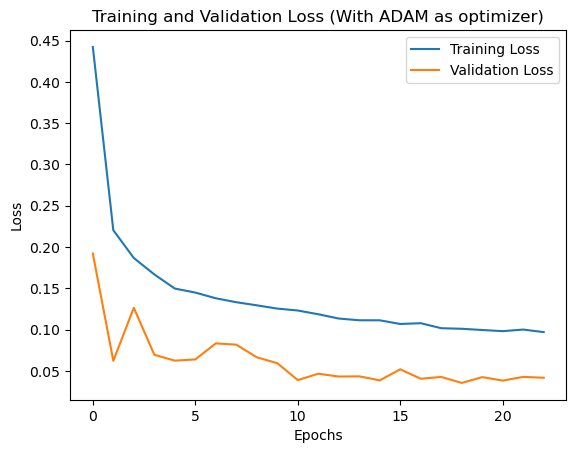

In [47]:
## checking for overfitting

# Plot training loss against validation loss

#Plots the training loss as a line with label "Training Loss".
plt.plot(history4.history['loss'], label='Training Loss')

#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history4.history['val_loss'], label='Validation Loss')

#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss (With ADAM as optimizer)')

#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')

#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')

#Shows the legend of the plot with the labels of the two lines.
plt.legend()

#Shows the plot on the screen.
plt.show()

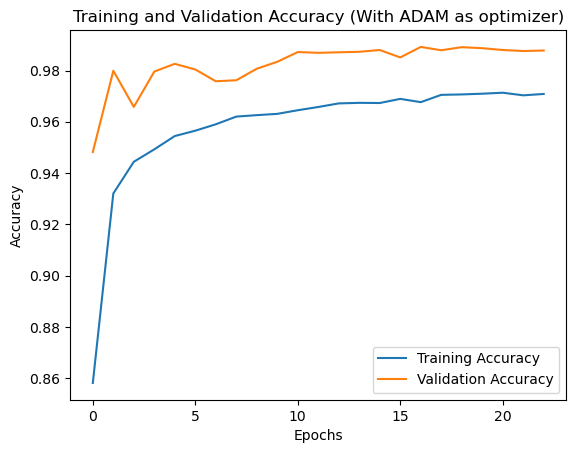

In [48]:
# Plot training and validation accuracy

#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history4.history['accuracy'], label='Training Accuracy')

#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy')

#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy (With ADAM as optimizer)')

#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')

#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')

#Shows the legend of the plot with the labels of the two lines.
plt.legend()

#Shows the plot on the screen.
plt.show()

In [49]:
#make predictions
y_pred4 = np.argmax(mnist_model4.predict(x_test), axis=-1)

313/313 [==============================] - 1s 3ms/step


In [50]:
#Visualize the result
from sklearn.metrics import classification_report
mnist_classification_report4 = classification_report(y_test, y_pred4,output_dict=True)

print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.96      0.99      0.97      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.96      0.98       958
           7       0.98      1.00      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [51]:
df_report4 = pd.DataFrame(mnist_classification_report4).transpose()
df_report4

,precision,recall,f1-score,support
0,0.994893,0.993878,0.994385,980.0000
1,0.998225,0.991189,0.994695,1135.0000
2,0.963981,0.985465,0.974605,1032.0000
3,0.996028,0.993069,0.994546,1010.0000
4,0.988810,0.989817,0.989313,982.0000
5,0.982083,0.983184,0.982633,892.0000
6,0.990333,0.962422,0.976178,958.0000
7,0.977077,0.995136,0.986024,1028.0000
8,0.995885,0.993840,0.994861,974.0000
9,0.991054,0.988107,0.989578,1009.0000


#### Observation(s)

- The model's accuracy decreased by 0.24% using Adam as the Optimizer while the validation loss increased by 18.62% with     0.0484 being the least validation loss for the Adam optimizer as against 0.0408 for the SGD optimizer


- There was instance of overfitting at the 3rd Epoch using Adam as the optimizer


- SGD optimizer performed better than Adam optimizer

In [52]:
#Using RMSProp as Optimizer
mnist_model5 = Sequential()
mnist_model5.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
mnist_model5.add(MaxPooling2D(pool_size=(2,2)))
mnist_model5.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
mnist_model5.add(MaxPooling2D(pool_size=(2,2)))
mnist_model5.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
mnist_model5.add(MaxPooling2D(pool_size=(2,2)))
mnist_model5.add(Flatten())
mnist_model5.add(BatchNormalization())
mnist_model5.add(Dense(128,activation = 'relu'))
mnist_model5.add(Dropout(0.5))
mnist_model5.add(Dense(10,activation = 'softmax'))
#compiling the model
mnist_model5.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
#Training and evaluating the model
history5=mnist_model5.fit(train_datagenerator.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),
         epochs=23, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/23
1875/1875 [==============================] - 27s 13ms/step - loss: 0.4297 - accuracy: 0.8632 - val_loss: 0.1421 - val_accuracy: 0.9644
Epoch 2/23
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2446 - accuracy: 0.9301 - val_loss: 0.4243 - val_accuracy: 0.9210
Epoch 3/23
1875/1875 [==============================] - 72s 38ms/step - loss: 0.2348 - accuracy: 0.9363 - val_loss: 0.3385 - val_accuracy: 0.9507
Epoch 4/23
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2377 - accuracy: 0.9377 - val_loss: 0.1946 - val_accuracy: 0.9740
Epoch 5/23
1875/1875 [==============================] - 71s 38ms/step - loss: 0.2424 - accuracy: 0.9382 - val_loss: 0.2786 - val_accuracy: 0.9508
Epoch 6/23
1875/1875 [==============================] - 71s 38ms/step - loss: 0.2408 - accuracy: 0.9401 - val_loss: 0.2062 - val_accuracy: 0.9731
Epoch 7/23
1875/1875 [==============================] - 72s 38ms/step - loss: 0.2478 - accuracy: 0.9380 - val_loss: 0.4972 -

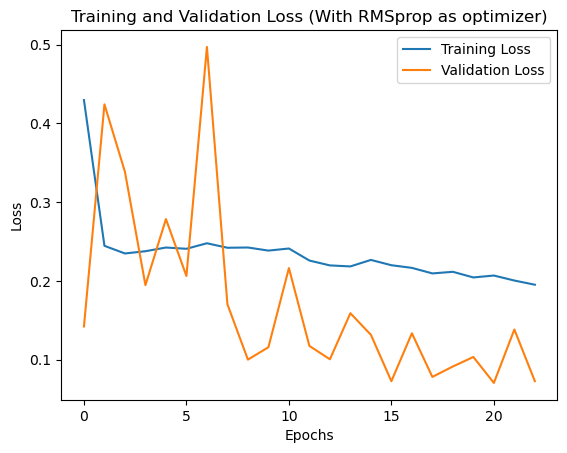

In [54]:
## checking for overfitting

# Plot training loss against validation loss

#Plots the training loss as a line with label "Training Loss".
plt.plot(history5.history['loss'], label='Training Loss')

#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history5.history['val_loss'], label='Validation Loss')

#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss (With RMSprop as optimizer)')

#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')

#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')

#Shows the legend of the plot with the labels of the two lines.
plt.legend()

#Shows the plot on the screen.
plt.show()

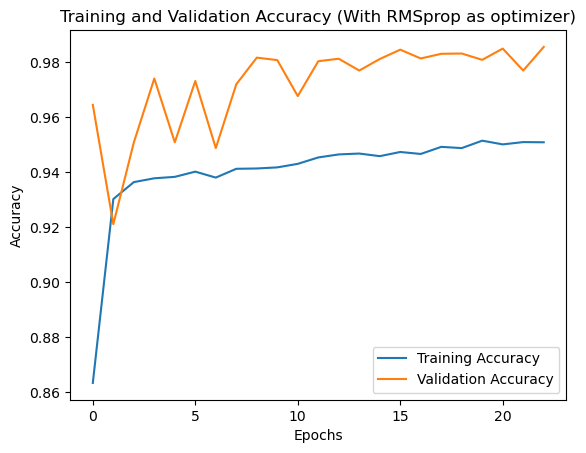

In [55]:
# Plot training and validation accuracy

#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history5.history['accuracy'], label='Training Accuracy')

#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history5.history['val_accuracy'], label='Validation Accuracy')

#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy (With RMSprop as optimizer)')

#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')

#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')

#Shows the legend of the plot with the labels of the two lines.
plt.legend()

#Shows the plot on the screen.
plt.show()

In [56]:
#make predictions
y_pred5 = np.argmax(mnist_model5.predict(x_test), axis=-1)

313/313 [==============================] - 2s 6ms/step


In [57]:
#Visualize the result
from sklearn.metrics import classification_report
mnist_classification_report5 = classification_report(y_test, y_pred5,output_dict=True)

print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       1.00      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.95      0.99      0.97       892
           6       0.99      0.97      0.98       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [58]:
df_report5 = pd.DataFrame(mnist_classification_report5).transpose()
df_report5

,precision,recall,f1-score,support
0,0.998968,0.987755,0.993330,980.0000
1,0.996448,0.988546,0.992481,1135.0000
2,0.967308,0.974806,0.971042,1032.0000
3,0.995020,0.989109,0.992056,1010.0000
4,0.983855,0.992872,0.988343,982.0000
5,0.954397,0.985426,0.969664,892.0000
6,0.987302,0.973904,0.980557,958.0000
7,0.993097,0.979572,0.986288,1028.0000
8,0.994835,0.988706,0.991761,974.0000
9,0.981409,0.994054,0.987691,1009.0000


#### Observation(s)

- The model's accuracy decreased by 0.32% using RMSprop as the Optimizer while the validation loss increased by 113.23% with 0.0870 being the least validation loss for the RMSprop optimizer as against 0.0408 for the SGD optimizer


- There were instances of overfitting at the 2nd and 3rd Epoch using RMSprop as the optimizer


- SGD optimizer performed better than RMSprop

# Question(b)

**Report how changes to the number of convolution blocks affect the performance ofyour model quantitatively?**

In [59]:
#Increaing the convolution blocks from 3 to 4 with epochs,learning rate, batchsize, optimizer kept constant
mnist_model6 = Sequential()
mnist_model6.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
mnist_model6.add(MaxPooling2D(pool_size=(2,2)))
mnist_model6.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
mnist_model6.add(MaxPooling2D(pool_size=(2,2)))
mnist_model6.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
mnist_model6.add(MaxPooling2D(pool_size=(2,2)))
mnist_model6.add(ZeroPadding2D(padding=((1, 1), (1, 1)))) # Add padding layer to resolve Negative dimension size error
mnist_model6.add(Conv2D(filters=256,kernel_size=(3,3),activation = 'relu'))
mnist_model6.add(MaxPooling2D(pool_size=(2,2)))
mnist_model6.add(Flatten())
mnist_model6.add(BatchNormalization())
mnist_model6.add(Dense(128,activation = 'relu'))
mnist_model6.add(Dropout(0.5))
mnist_model6.add(Dense(10,activation = 'softmax'))
#compiling the model
mnist_model6.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
#Training and evaluating the model
history6=mnist_model6.fit(train_datagenerator.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),
         epochs=23, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/23
1875/1875 [==============================] - 77s 39ms/step - loss: 0.6731 - accuracy: 0.7807 - val_loss: 0.2972 - val_accuracy: 0.9035
Epoch 2/23
1875/1875 [==============================] - 73s 39ms/step - loss: 0.3024 - accuracy: 0.9063 - val_loss: 0.0887 - val_accuracy: 0.9699
Epoch 3/23
1875/1875 [==============================] - 72s 39ms/step - loss: 0.2245 - accuracy: 0.9308 - val_loss: 0.0835 - val_accuracy: 0.9732
Epoch 4/23
1875/1875 [==============================] - 69s 37ms/step - loss: 0.1890 - accuracy: 0.9435 - val_loss: 0.0644 - val_accuracy: 0.9797
Epoch 5/23
1875/1875 [==============================] - 69s 37ms/step - loss: 0.1659 - accuracy: 0.9502 - val_loss: 0.0544 - val_accuracy: 0.9821
Epoch 6/23
1875/1875 [==============================] - 72s 39ms/step - loss: 0.1542 - accuracy: 0.9536 - val_loss: 0.0960 - val_accuracy: 0.9712
Epoch 7/23
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1346 - accuracy: 0.9589 - val_loss: 0.0470 -

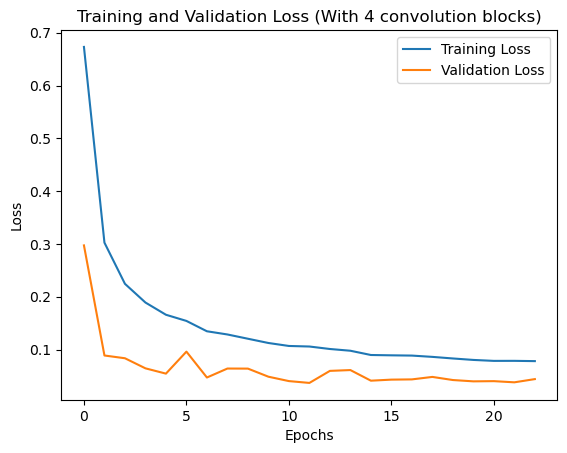

In [61]:
## checking for overfitting

# Plot training loss against validation loss

#Plots the training loss as a line with label "Training Loss".
plt.plot(history6.history['loss'], label='Training Loss')

#Plots the validation loss as a line with label "Validation Loss".
plt.plot(history6.history['val_loss'], label='Validation Loss')

#Sets the title of the plot to "Training and Validation Loss".
plt.title('Training and Validation Loss (With 4 convolution blocks)')

#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')

#Sets the label of the y-axis to "Loss".
plt.ylabel('Loss')

#Shows the legend of the plot with the labels of the two lines.
plt.legend()

#Shows the plot on the screen.
plt.show()

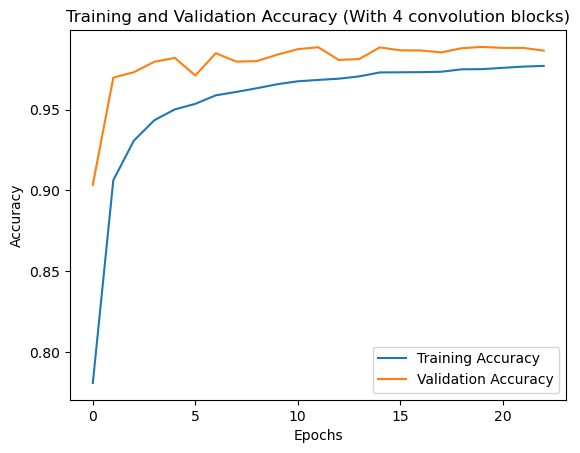

In [62]:
# Plot training and validation accuracy

#Plots the training accuracy as a line with label "Training Accuracy".
plt.plot(history6.history['accuracy'], label='Training Accuracy')

#Plots the validation accuracy as a line with label "Validation Accuracy".
plt.plot(history6.history['val_accuracy'], label='Validation Accuracy')

#Sets the title of the plot to "Training and Validation Accuracy".
plt.title('Training and Validation Accuracy (With 4 convolution blocks)')

#Sets the label of the x-axis to "Epochs".
plt.xlabel('Epochs')

#Sets the label of the y-axis to "Accuracy".
plt.ylabel('Accuracy')

#Shows the legend of the plot with the labels of the two lines.
plt.legend()

#Shows the plot on the screen.
plt.show()

In [63]:
#make predictions
y_pred6 = np.argmax(mnist_model6.predict(x_test), axis=-1)

313/313 [==============================] - 1s 3ms/step


In [64]:
#Visualize the result
from sklearn.metrics import classification_report
mnist_classification_report6 = classification_report(y_test, y_pred6,output_dict=True)

print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.99      1.00      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.97      0.98      0.97       892
           6       0.99      0.97      0.98       958
           7       0.98      0.99      0.99      1028
           8       0.99      1.00      1.00       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [65]:
df_report6 = pd.DataFrame(mnist_classification_report6).transpose()
df_report6

,precision,recall,f1-score,support
0,0.997945,0.990816,0.994368,980.0000
1,0.998222,0.989427,0.993805,1135.0000
2,0.965550,0.977713,0.971594,1032.0000
3,0.990186,0.999010,0.994579,1010.0000
4,0.975174,1.000000,0.987431,982.0000
5,0.969900,0.975336,0.972610,892.0000
6,0.991453,0.968685,0.979937,958.0000
7,0.983591,0.991245,0.987403,1028.0000
8,0.993859,0.996920,0.995387,974.0000
9,0.998985,0.975223,0.986961,1009.0000


#### Observation(s)

- The model's accuracy remained the same despite an increase in the number of convolution blocks, while the validation loss decreased by 5.39% from 0.0408 to 0.0386. However, considering the time it took to train the model and the weighted average accuracy which is higher in the model with three (3) convolution blocks, the model with 3 convolution blocks is a more optimal option 

# Question(c)

**What is the effect of varying learning rates on the performance of the CNN algorithm?**

In [66]:
# We would try to find the learning rate that yields the best performance on a validation setusing keras 
#tuner hyperparameter tuning

In [67]:
!pip install keras-tuner -q

In [68]:
#importing needed libraries
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch

In [69]:
def build_cnn_model(hp):
    model = keras.Sequential()
    model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(layers.Dense(128,activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(layers.Dense(10, activation="softmax"))
    model.compile(optimizer=keras.optimizers.SGD
                  (hp.Choice('learning_rate', [0.01,0.005,0.0025,0.00125,0.001844]),momentum=0.9),
                  loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [70]:
tuner = RandomSearch(
    build_cnn_model, #The function containing the built model
    objective="val_accuracy",  #The name of the objective to optimize
    max_trials=5, #The total number of trials to run during the search
    executions_per_trial=1, #The number of models that should be built and fit for each trial
    overwrite=True, #Decide whether to overwrite the previous results in the same directory or resume the previous search instead
    directory="my_dir",   #A path to a directory for storing the search results
    project_name="cnn_mints_classification"   #The name of the sub-directory in the directory.
)

In [71]:
#printing a summary of the search space
tuner.search_space_summary()

Search space summary
Default search space size: 1
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.005, 0.0025, 0.00125, 0.001844], 'ordered': True}


In [72]:
history7=tuner.search(train_datagenerator.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),
         epochs=23, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Trial 5 Complete [00h 11m 29s]
val_accuracy: 0.9887999892234802

Best val_accuracy So Far: 0.9887999892234802
Total elapsed time: 03h 48m 15s


In [73]:
tuner.results_summary()

Results summary
Results in my_dir\cnn_mints_classification
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
learning_rate: 0.005
Score: 0.9887999892234802

Trial 4 summary
Hyperparameters:
learning_rate: 0.001844
Score: 0.9887999892234802

Trial 1 summary
Hyperparameters:
learning_rate: 0.0025
Score: 0.9886000156402588

Trial 0 summary
Hyperparameters:
learning_rate: 0.01
Score: 0.9873999953269958

Trial 3 summary
Hyperparameters:
learning_rate: 0.00125
Score: 0.9871000051498413


#### Observation(s)

- The model's accuracy would increase by 0.15% if the learning rate of 0.00125 is used


- Varying the learning rate of a model could impact the models' performace as shown in the summary above 

# Question(d)

**Was there a case of overfitting observed in your model at any point ?**

- Overfitting was seen at the 3rd Epoch when the validation loss (0.2246) of the model exceeded the training loss (0.1829) using Adam as the optimizer. 


- Overfitting was seen at the 2nd and 3rd Epoch when the validation loss (0.4815) and (0.4801) of the model exceeded the training loss (0.2519) and (0.2450) using RMSprop as the optimizer. 